In [135]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import tensorflow
from sklearn.metrics import r2_score
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [136]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop(index=31980)
train_df = train_df.drop(columns=['ID'])
leadtime = train_df['lead_time']
arrivaldateyear = train_df['arrival_date_year']
arrivaldateweekno = train_df['arrival_date_week_number']
arrivaldatedayofmonth = train_df['arrival_date_day_of_month']
staysweekendnights = train_df['stays_in_weekend_nights']
staysweeknights = train_df['stays_in_week_nights']
adults = train_df['adults']
children = train_df['children']
babies = train_df['babies']
isrepeatedguest = train_df['is_repeated_guest'] 
previouscancellations = train_df['previous_cancellations']
previousbookingsnotcanceled = train_df['previous_bookings_not_canceled']
bookingchanges = train_df['booking_changes']
agent = train_df['agent']
company = train_df['company']
dayswaitinglist = train_df['days_in_waiting_list']
#adr = train_df['adr']

rcps = train_df['required_car_parking_spaces']
totalsqr = train_df['total_of_special_requests']
train_df['country']=train_df['country'].fillna(train_df['country'].value_counts().index[0])
train_df['agent']=train_df['agent'].fillna(train_df['agent'].value_counts().index[0])
train_df['company']=train_df['company'].fillna(0)
train_df['children']=train_df['children'].fillna(train_df['children'].median())

In [137]:
inv_cal = np.where(train_df['is_canceled']==0,1,0)
train_df['new_adr'] = inv_cal * train_df['adr']
adr = train_df['new_adr']
adr

0        -6.305161
1        75.052227
2        74.546401
3        76.376288
4        49.411647
           ...    
91526     0.000000
91527    -6.822102
91528    90.814554
91529    38.135565
91530    58.196470
Name: new_adr, Length: 91530, dtype: float64

In [138]:
y1 = np.array(adr)
y1

array([-6.30516084, 75.05222697, 74.54640111, ..., 90.81455355,
       38.1355651 , 58.19647044])

In [139]:
iscanceled = train_df.is_canceled.astype("category").cat.codes
iscanceledcat=pd.Series(iscanceled)
arrivaldatemonth = train_df.arrival_date_month.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=train_df.meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.market_segment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.distribution_channel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.reserved_room_type.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.assigned_room_type.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.deposit_type.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.customer_type.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.reservation_status.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)
isrepeatedguestcat = train_df.is_repeated_guest.astype("category").cat.codes
isrepeatedguestcat=pd.Series(isrepeatedguestcat)
agentcat = train_df.agent.astype("category").cat.codes
agentcat=pd.Series(agentcat)
companycat = train_df.company.astype("category").cat.codes
companycat=pd.Series(companycat)

In [140]:
x1 = np.column_stack((countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateweekno))
x1 = sm.add_constant(x1, prepend=True)

In [141]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1,random_state=45)

In [142]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

scaler_x = StandardScaler()
scaler_y = StandardScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

StandardScaler()
StandardScaler()
StandardScaler()
StandardScaler()


In [143]:
ytrain_scale

array([[ 0.26359007],
       [ 1.19439245],
       [ 0.41694844],
       ...,
       [ 0.07211292],
       [ 1.17529326],
       [-0.97349611]])

In [144]:
xtrain_scale

array([[ 0.        , -0.29896503,  0.88849174, ..., -0.25068824,
         3.70953438, -1.14737616],
       [ 0.        , -0.89428979, -1.47493989, ..., -0.25068824,
        -0.26066217, -1.48019004],
       [ 0.        ,  1.66064565,  0.88849174, ..., -0.25068824,
         3.70953438, -1.41362726],
       ...,
       [ 0.        , -0.99351058, -0.68712935, ...,  1.39799882,
        -0.26066217,  0.45013044],
       [ 0.        ,  0.8916845 ,  0.10068119, ..., -0.25068824,
        -0.26066217,  0.78294431],
       [ 0.        ,  0.8916845 , -0.68712935, ..., -3.54806236,
        -0.26066217,  0.51669321]])

In [208]:
model = Sequential()
model.add(Dense(90, input_dim=7, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2680, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 90)                720       
_________________________________________________________________
dense_65 (Dense)             (None, 2680)              243880    
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 2681      
Total params: 247,281
Trainable params: 247,281
Non-trainable params: 0
_________________________________________________________________


In [209]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/30
367/367 [==============================] - 1s 3ms/step - loss: 0.9476 - mse: 0.9476 - mae: 0.8243 - val_loss: 0.9013 - val_mse: 0.9013 - val_mae: 0.7988
Epoch 2/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8900 - mse: 0.8900 - mae: 0.7989 - val_loss: 0.8986 - val_mse: 0.8986 - val_mae: 0.7976
Epoch 3/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8812 - mse: 0.8812 - mae: 0.7936 - val_loss: 0.8943 - val_mse: 0.8943 - val_mae: 0.7950
Epoch 4/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8873 - mse: 0.8873 - mae: 0.7981 - val_loss: 0.8931 - val_mse: 0.8931 - val_mae: 0.7951
Epoch 5/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8750 - mse: 0.8750 - mae: 0.7931 - val_loss: 0.8879 - val_mse: 0.8879 - val_mae: 0.7920
Epoch 6/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8836 - mse: 0.8836 - mae: 0.7969 - val_loss: 0.8899 - val_mse: 0.8899 - val_mae: 0.7926
Epoch 7/30
367/3

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


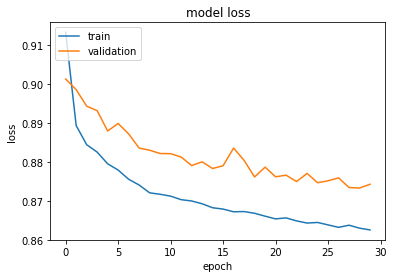

In [210]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [211]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[111.467995],
       [ 55.15553 ],
       [ 58.67227 ],
       ...,
       [ 75.494865],
       [ 56.510174],
       [ 54.909576]], dtype=float32)

In [212]:
mean_absolute_error(y_val, predictions)

44.4343847339389

In [213]:
mean_squared_error(y_val, predictions)
math.sqrt(mean_squared_error(y_val, predictions))

52.72712334935554

In [214]:
r2_score(y_val, predictions)

0.13116024330020404

In [215]:
np.mean(y_val)

54.9023869500888

In [216]:
np.mean(predictions)

64.46293